# 新疆会员价值分析
### 参考数据: 2021年新疆交投etc收费流水数据
### 分析目标: 新疆ect会员（七月缴费行为）
### 使用模型：根据RFM模型建立相关对应指标，根据Kmeans模型对会员进行聚类
### 根据会员种类和分布情况分析出不同价值的用户，为下一步营销策略做好基础

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
# from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 


In [2]:
#读取数据
data = pd.read_excel('ETC用户7月起终点带时间收费流水数据.xlsx')
data

,车牌号,行驶里程,入站名称,经度（起始）,纬度（起始）,出站名称,经度（终点）,纬度（终点）,入站时间,出站时间,积分,实缴金额,行驶里程.1,比例
0,用户4878,53500,新疆巴彦岱匝道站,81.226477,43.980944,新疆惠远东主线站,80.994929,44.004260,1900-01-02 00:00:00.000000,2021-07-15 00:43:09.000000,1873,18.73,53.500,0.350093
1,用户2401,178354,安集海匝道,85.366007,44.340257,新疆头屯河主线站,87.293148,43.948453,2021-07-01 15:36:50.000000,2021-07-01 18:14:34.000000,47600,476.00,178.354,2.668850
2,用户2401,27470,新疆乌拉泊西主线站,87.520195,43.708192,新疆芨东匝道站,87.725617,43.629489,2021-07-01 19:01:51.000001,2021-07-01 19:25:01.000004,7150,71.50,27.470,2.602839
3,用户2401,208700,新疆烟墩主线站,94.012201,42.291189,新疆烟墩主线站,94.012201,42.291189,2021-07-02 06:13:44.999999,2021-07-02 06:23:45.000004,49962,499.62,208.700,2.393963
4,用户2401,80300,新疆二堡主线站,93.008672,43.011924,新疆二堡主线站,93.008672,43.011924,2021-07-02 04:42:53.999997,2021-07-02 04:52:54.000002,19224,192.24,80.300,2.394022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49557,用户4021,90727,新疆三台油库匝道站,88.721030,44.237383,新疆甘泉堡匝道站,87.742916,44.119693,2021-07-26 20:11:07.999999,2021-07-27 06:45:29.999998,24386,243.86,90.727,2.687844
49558,用户4021,90418,新疆米东北主线站,87.699153,44.099473,新疆滋泥泉子匝道站,88.723314,44.154472,2021-07-28 13:21:56.999998,2021-07-28 14:24:37.999999,25421,254.21,90.418,2.811498
49559,用户4021,99427,新疆三台油库匝道站,88.721030,44.237383,新疆米东北主线站,87.699153,44.099473,2021-07-29 03:02:39.999995,2021-07-29 04:25:04.999996,26902,269.02,99.427,2.705704
49560,用户4021,67020,新疆五工台匝道站,86.702647,44.191381,新疆头屯河主线站,87.293148,43.948453,2021-07-29 09:09:50.000000,2021-07-29 09:54:48.999997,17693,176.93,67.020,2.639958


In [3]:
data.columns = ['车牌号', '行驶里程', '入站名称', '经度（起始）', '纬度（起始）', '出站名称', '经度（终点）', '纬度（终点）',
       '入站时间', '出站时间', '积分', '实缴金额', '里程','单位里程缴费']

In [4]:
data

,车牌号,行驶里程,入站名称,经度（起始）,纬度（起始）,出站名称,经度（终点）,纬度（终点）,入站时间,出站时间,积分,实缴金额,里程,单位里程缴费
0,用户4878,53500,新疆巴彦岱匝道站,81.226477,43.980944,新疆惠远东主线站,80.994929,44.004260,1900-01-02 00:00:00.000000,2021-07-15 00:43:09.000000,1873,18.73,53.500,0.350093
1,用户2401,178354,安集海匝道,85.366007,44.340257,新疆头屯河主线站,87.293148,43.948453,2021-07-01 15:36:50.000000,2021-07-01 18:14:34.000000,47600,476.00,178.354,2.668850
2,用户2401,27470,新疆乌拉泊西主线站,87.520195,43.708192,新疆芨东匝道站,87.725617,43.629489,2021-07-01 19:01:51.000001,2021-07-01 19:25:01.000004,7150,71.50,27.470,2.602839
3,用户2401,208700,新疆烟墩主线站,94.012201,42.291189,新疆烟墩主线站,94.012201,42.291189,2021-07-02 06:13:44.999999,2021-07-02 06:23:45.000004,49962,499.62,208.700,2.393963
4,用户2401,80300,新疆二堡主线站,93.008672,43.011924,新疆二堡主线站,93.008672,43.011924,2021-07-02 04:42:53.999997,2021-07-02 04:52:54.000002,19224,192.24,80.300,2.394022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49557,用户4021,90727,新疆三台油库匝道站,88.721030,44.237383,新疆甘泉堡匝道站,87.742916,44.119693,2021-07-26 20:11:07.999999,2021-07-27 06:45:29.999998,24386,243.86,90.727,2.687844
49558,用户4021,90418,新疆米东北主线站,87.699153,44.099473,新疆滋泥泉子匝道站,88.723314,44.154472,2021-07-28 13:21:56.999998,2021-07-28 14:24:37.999999,25421,254.21,90.418,2.811498
49559,用户4021,99427,新疆三台油库匝道站,88.721030,44.237383,新疆米东北主线站,87.699153,44.099473,2021-07-29 03:02:39.999995,2021-07-29 04:25:04.999996,26902,269.02,99.427,2.705704
49560,用户4021,67020,新疆五工台匝道站,86.702647,44.191381,新疆头屯河主线站,87.293148,43.948453,2021-07-29 09:09:50.000000,2021-07-29 09:54:48.999997,17693,176.93,67.020,2.639958


### 对数据进行清洗，检查空值和异常值。

In [5]:
data.isnull().any()

车牌号        True
行驶里程      False
入站名称      False
经度（起始）    False
纬度（起始）    False
出站名称      False
经度（终点）    False
纬度（终点）    False
入站时间      False
出站时间      False
积分        False
实缴金额      False
里程        False
单位里程缴费     True
dtype: bool

In [6]:
#缺失值
#车牌号缺失十一条数据，对49562条数据而言影响不大。这里选择直接删除
data['车牌号'].isnull().sum()

11

In [7]:
data.drop(data[data['车牌号'].isnull() == True].index,axis=0,inplace=True)

In [8]:
#异常值
data['时间差'] = (data['出站时间']-data['入站时间']).apply(lambda x:x.days)

In [9]:
#将行驶时间超过31天的视为异常值然后删除（观测周期为七月）
data.drop(data[data['时间差']>31].index,inplace= True)

In [10]:
data['时间差（秒）'] = (data['出站时间']-data['入站时间']).dt.total_seconds()

In [11]:
data['参考时间'] = pd.to_datetime('2021-08-01 00:00:00')

In [12]:
data['最近时间差'] = (data['参考时间']-data['出站时间']).dt.total_seconds()

### 首先确定分析对象，对象是新疆交投下所有已经注册的ETC用户。
### 再确定需要考察用户的相关特征，参考RFM模型和民航的LRFMC模型，在现有数据的基础上，确定需要分析的ETC用户特征如下（其中观测时间窗口为2021-7-01至2021-7-31）：
### R 用户最近一次的缴费时间（表征用户活跃度）
### F 用户在观测窗口期间的缴费频率（用户忠诚度）
### M 用户的行驶里程
### C 用户的缴费总额 （M和C共同表征用户价值）

### 首先根据车牌号分别统计相关字段，形成新的数据dataframe

In [13]:
import numpy as np

#首先求解R，根据入站时间对车牌号分组再选择最近的时间，再与观测时间（这里设为次月首日，2021-8-1 00:00:00）作差，得到R下的指标（为了和其他指标趋势相同，这里取负数）
user_KPI = pd.DataFrame()
user_KPI['R'] = -np.array(data.groupby('车牌号')['最近时间差'].min())

#缴费频率F：
user_KPI['F'] = np.array(data.groupby('车牌号')['入站时间'].count())
#对每个用户七月的里程求和
user_KPI['M'] = np.array(data.groupby('车牌号')['里程'].sum())
#对每个用户七月的缴费平均额作为衡量C的指标，等于缴费总额/缴费频次
user_KPI['C'] = np.array(data.groupby('车牌号')['实缴金额'].sum()/data.groupby('车牌号')['入站时间'].count())

In [14]:
user_KPI

,R,F,M,C
0,-1.257030e+05,16,2109.284,58.028125
1,-1.421000e+04,14,729.980,14.275000
2,-2.975040e+05,6,410.115,20.430000
3,-7.895000e+03,14,648.550,13.793571
4,-2.047330e+05,5,885.070,53.214000
...,...,...,...,...
3707,-9.827300e+04,25,1780.493,21.212800
3708,-1.145819e+06,5,696.553,37.818000
3709,-1.749965e+06,2,40.620,6.900000
3710,-2.635690e+05,2,334.160,49.920000


### 对user_KPI进行标准化统一量纲，这里使用z-score对其标准化

In [15]:
user_standard = (user_KPI - user_KPI.mean(axis = 0)) /user_KPI.std(axis = 0) 

In [16]:
user_standard

,R,F,M,C
0,0.755897,0.163325,0.501100,0.184680
1,0.923585,0.040126,-0.352761,-0.640557
2,0.497503,-0.452670,-0.550774,-0.524466
3,0.933083,0.040126,-0.403170,-0.649637
4,0.637034,-0.514269,-0.256752,0.093880
...,...,...,...,...
3707,0.797152,0.717720,0.297561,-0.509701
3708,-0.778385,-0.514269,-0.373454,-0.196507
3709,-1.687037,-0.699067,-0.779510,-0.779658
3710,0.548543,-0.699067,-0.597794,0.031751


### 使用K-means模型对用户进行分类,再使用SSE决定分类的类别数。

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
dis = []
for i in range(1,12):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=500,tol=1e-4,random_state=0)
    km.fit(np.array(user_standard))
    dis.append(km.inertia_)


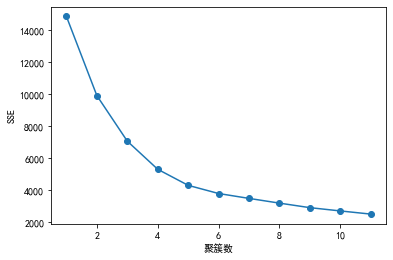

In [18]:
plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure()
plt.plot(range(1,12),dis,marker='o')
plt.xlabel('聚簇数')
plt.ylabel("SSE")
plt.show()

### 从k = 5开始出现拐点，所以选择k=5

In [19]:
k = 5 
km = KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=500,tol=1e-4,random_state=0)
km.fit(np.array(user_standard))
user_label = pd.concat([user_standard,pd.Series(km.labels_,name= '种类')],axis=1)

In [20]:
number =pd.Series(user_label['种类'].value_counts(),name = '种类数量')

In [21]:
center = pd.DataFrame(km.cluster_centers_)
center_data = pd.concat([center,number],axis=1)
center_data

,0,1,2,3,种类数量
0,0.665857,0.771912,0.747768,-0.107469,654
1,-1.621156,-0.536585,-0.486153,-0.076474,806
2,0.286115,0.786786,1.476386,5.813331,66
3,0.817859,3.814149,3.653816,0.610549,131
4,0.362164,-0.305185,-0.329209,-0.161509,2055


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


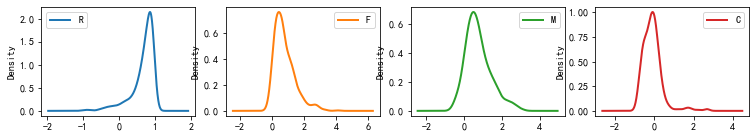

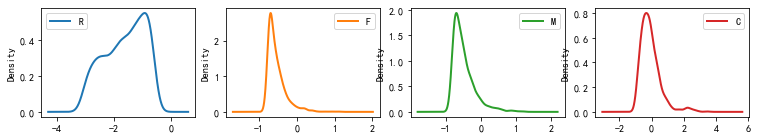

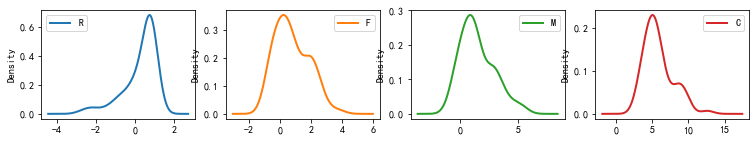

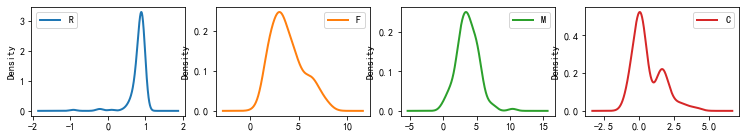

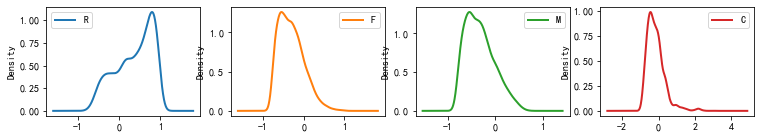

In [22]:
for i in range(k):
    user_standard[user_label['种类'] == i].plot(kind= 'kde',linewidth =2,
                                                               subplots =True,sharex =False,
                                                               layout = (1,user_label.shape[1])
                                                               ,figsize = (16,2))
    plt.legend()
plt.show()   

In [23]:
center_data.columns = list(user_standard.columns) + ['mem_class']

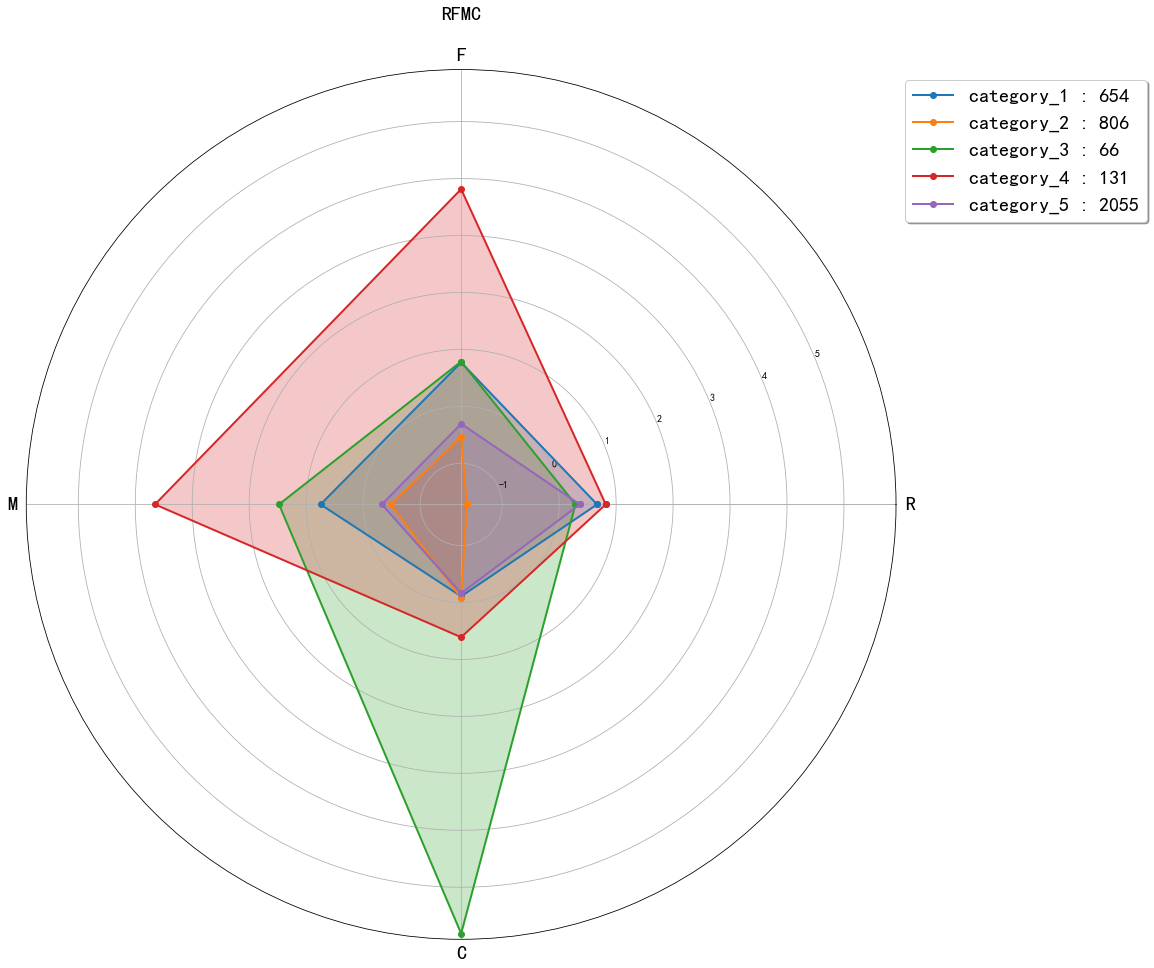

In [24]:
max_v = center.values.max()
min_v = center.values.min()
#以聚类中心的雷达图表征各类特征，图示如下所示：
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111,polar =True)
center_number = center_data.values
fea = user_KPI.columns

N = len(fea)
for i,v in enumerate(center_number):
    angles = np.linspace(0,2 * np.pi,N,endpoint=False)#设置角度
    center = np.concatenate((v[:-1],[v[0]]))
    angles = np.concatenate((angles,[angles[0]]))
    
    ax.plot(angles,center,'o-',linewidth =2,label= 'category_%d : %d' %(i+1,v[-1]))
    ax.fill(angles,center,alpha =0.25)
    ax.set_thetagrids(angles *180/np.pi,fea,fontsize =20)
    ax.set_ylim(min_v -0.1,max_v +0.1)
    plt.title('RFMC',fontsize=20)
    ax.grid(True)
    plt.legend(loc= 'upper right',bbox_to_anchor=(1.3,1.0),ncol =1,fancybox =True,
               shadow =True,fontsize =20)
plt.show()